<a href="https://colab.research.google.com/github/Geethika1205/Generative_AI_2025/blob/main/curveroad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving road curve.jpeg to road curve.jpeg


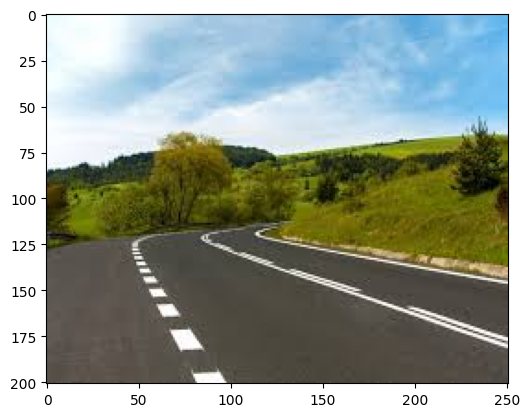

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = list(uploaded.keys())[0]
img = mpimg.imread("/content/road curve.jpeg")
plt.imshow(img)
plt.axis('on')
plt.show()


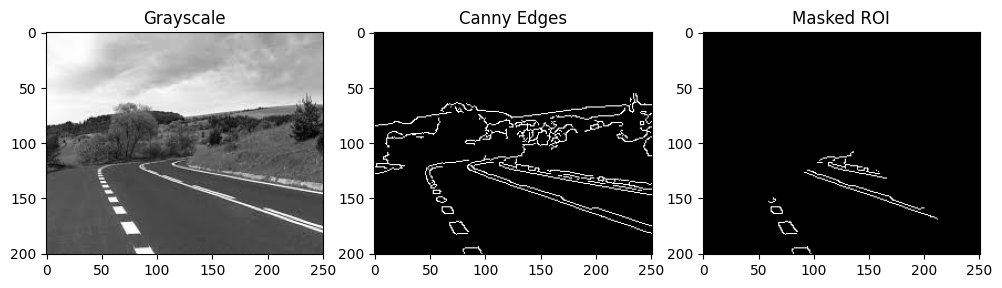

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# Load image
image_path = '/content/road curve.jpeg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Define region of interest (ROI)
height, width = edges.shape
roi_vertices = np.array([[(0, height), (width//2, height//2), (width, height)]], dtype=np.int32)
masked_edges = region_of_interest(edges, roi_vertices)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Masked ROI")
plt.imshow(masked_edges, cmap='gray')

plt.tight_layout()
plt.show()


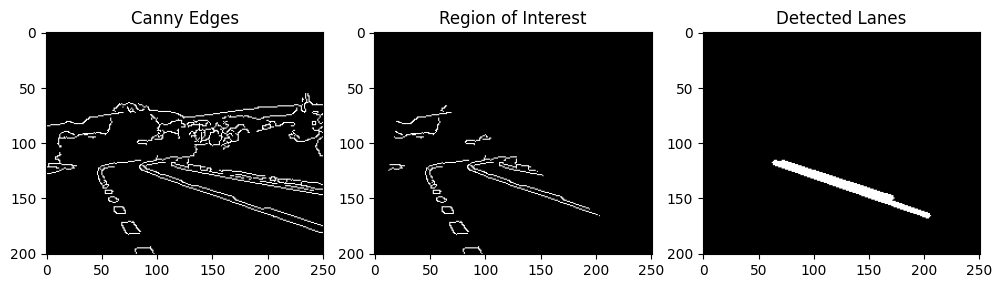

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    # Define a polygon to cover the full curved lane dynamically
    polygon = np.array([
        [(0, height), (width * 0.11, height * 0.2),
         (width * 0.55, height * 0.6), (width, height)]
    ], dtype=np.int32)

    cv2.fillPoly(mask, [polygon], 255)
    return cv2.bitwise_and(img, mask)

def detect_lanes(img):
    lines = cv2.HoughLinesP(img, 1, np.pi/180, 50, minLineLength=50, maxLineGap=150)
    line_img = np.zeros_like(img)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), 255, thickness=3)

    return line_img

# Load image
image_path = '/content/road curve.jpeg'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Apply region of interest
roi_edges = region_of_interest(edges)

# Detect lane lines
lane_lines = detect_lanes(roi_edges)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Region of Interest")
plt.imshow(roi_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Detected Lanes")
plt.imshow(lane_lines, cmap='gray')

plt.tight_layout()
plt.show()


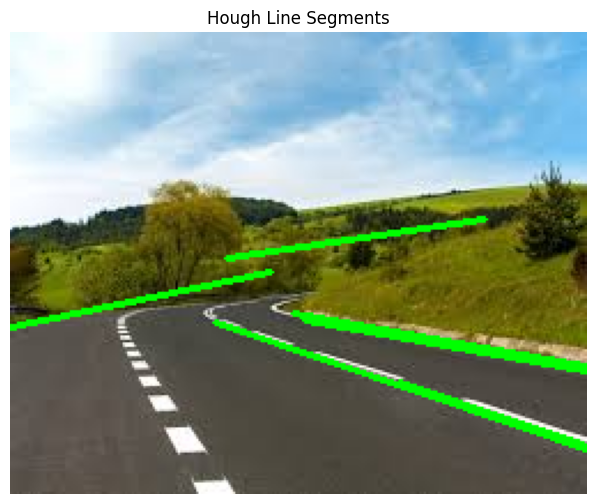

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the road image
road_image_path = "/content/road curve.jpeg"  # Change this to the actual path if needed
road_image = cv2.imread(road_image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150)

# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=80, maxLineGap=5)

# Draw the detected lines on a copy of the original image
line_image = np.copy(road_image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Display the results
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Hough Line Segments")
plt.axis("off")
plt.show()


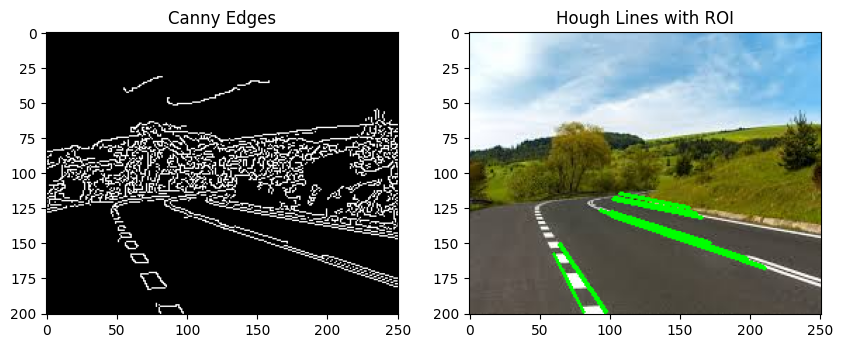

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/road curve.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# Define a region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define a polygonal ROI (adjust coordinates as needed)
    mask = np.zeros_like(img)
    polygon = np.array([
        [(4, height), (width // 2, height // 2), (width, height)]
    ], np.int32)

    # Fill the ROI with white
    cv2.fillPoly(mask, polygon, 255)

    # Apply the mask
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

# Apply the ROI mask
masked_edges = region_of_interest(edges)

# Detect lines using Probabilistic Hough Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=20, minLineLength=20, maxLineGap=75)

# Draw detected lines on a copy of the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines with ROI')

plt.show()


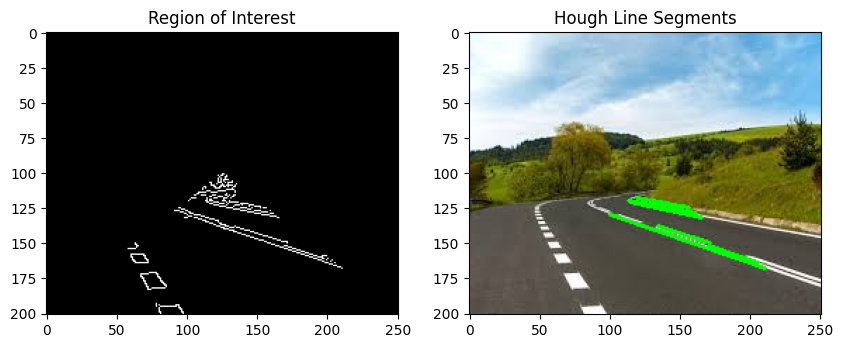

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/road curve.jpeg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# Define the region of interest (ROI)
def region_of_interest(img):
    height, width = img.shape[:2]

    # Define a polygonal ROI (adjust coordinates as needed)
    mask = np.zeros_like(img)
    polygon = np.array([
        [(0, height), (width // 2, height // 2), (width, height)]
    ], np.int32)

    # Fill the ROI with white
    cv2.fillPoly(mask, [polygon], 255)

    # Apply the mask
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

# Apply the ROI mask
masked_edges = region_of_interest(edges)

# Detect lines using Probabilistic Hough Transform
lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)

# Draw detected lines on a copy of the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(masked_edges, cmap='gray')
plt.title('Region of Interest')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Segments')

plt.show()


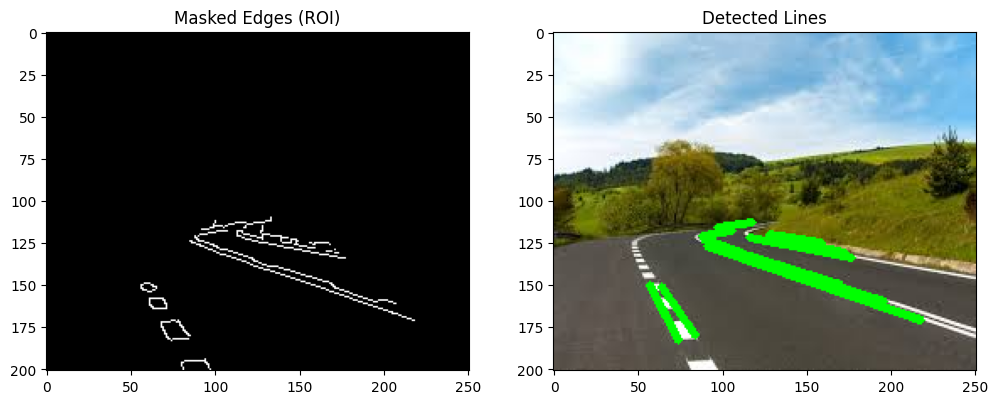

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img):
    """
    Masks the input image to keep only the region of interest.
    Adjust coordinates as needed for your particular image.
    """
    height, width = img.shape[:2]
    mask = np.zeros_like(img)

    # Example polygon that covers more of the road
    # This polygon is somewhat trapezoidal:
    #   bottom-left -> top-left -> top-right -> bottom-right
    polygon = np.array([
        [ (0, height),
          (int(width * 0.40), int(height * 0.55)),
          (int(width * 0.60), int(height * 0.55)),
          (width, height) ]
    ], np.int32)

    cv2.fillPoly(mask, polygon, 255)
    return cv2.bitwise_and(img, mask)

# Load the image
image_path = "/content/road curve.jpeg"
image = cv2.imread(image_path)
if image is None:
    raise IOError("Could not read the image. Check the path.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (optional but helps smooth out noise)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
# Adjust thresholds to capture the lines more robustly
edges = cv2.Canny(blurred, 50, 150)

# Mask the edges image
masked_edges = region_of_interest(edges)

# Detect lines using Probabilistic Hough Transform
# Adjust parameters as needed
lines = cv2.HoughLinesP(
    masked_edges,
    rho=1,                  # distance resolution in pixels
    theta=np.pi/180,        # angle resolution in radians
    threshold=20,           # minimum number of votes
    minLineLength=10,       # minimum length of line
    maxLineGap=10         # max allowed gap between points on the same line
)

# Draw detected lines
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 4)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(masked_edges, cmap='gray')
plt.title("Masked Edges (ROI)")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")

plt.show()


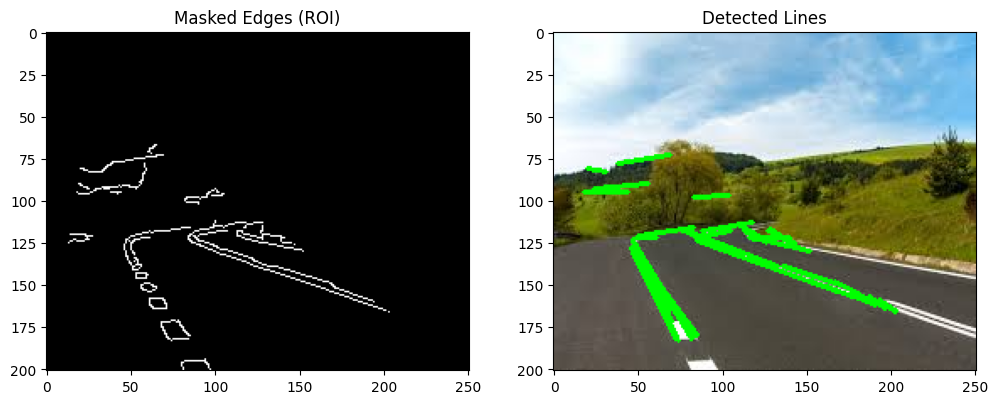

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img):
    height, width = img.shape
    mask = np.zeros_like(img)

    # Define a polygon to cover the full curved lane dynamically
    polygon = np.array([
        [(0, height), (width * 0.11, height * 0.2),
         (width * 0.55, height * 0.6), (width, height)]
    ], dtype=np.int32)

    cv2.fillPoly(mask, [polygon], 255)
    return cv2.bitwise_and(img, mask)

def detect_lanes(img):
    lines = cv2.HoughLinesP(img, 1, np.pi/180, 50, minLineLength=50, maxLineGap=150)
    line_img = np.zeros_like(img)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), 255, thickness=3)

    return line_img


image_path = "/content/road curve.jpeg"
image = cv2.imread(image_path)
if image is None:
    raise IOError("Could not read the image. Check the path.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (optional but helps smooth out noise)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
# Adjust thresholds to capture the lines more robustly
edges = cv2.Canny(blurred, 50, 150)

# Mask the edges image
masked_edges = region_of_interest(edges)

# Detect lines using Probabilistic Hough Transform
# Adjust parameters as needed
lines = cv2.HoughLinesP(
    masked_edges,
    rho=1,                  # distance resolution in pixels
    theta=np.pi/180,        # angle resolution in radians
    threshold=15,           # minimum number of votes
    minLineLength=10,       # minimum length of line
    maxLineGap=10       # max allowed gap between points on the same line
)

# Draw detected lines
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(masked_edges, cmap='gray')
plt.title("Masked Edges (ROI)")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")

plt.show()
